# Exploratory Data Analysis (EDA) & Preprocessing for Power BI
This notebook performs general EDA and preprocessing steps on:
- One **main table**: API_IS.AIR.PSGR_DS2_en_csv_v2_294362.csv
- Two **metadata tables**: Metadata_Country_API_IS.AIR.PSGR_DS2_en_csv_v2_294362.csv, Metadata_Indicator_API_IS.AIR.PSGR_DS2_en_csv_v2_294362.csv

All files are located in the folder API_IS.AIR.PSGR_DS2_en_csv_v2_294362.

The goal is to clean, explore, and prepare data for use in Power BI.

The following preprocessing steps are performed:
- Only countries are kept in the preprocessed data tables, and rows with aggregations over multiple countries are removed.

Cleaned data exported in API_IS.AIR.PSGR_DS2_en_csv_v2_294362_clean.csv and Metadata_Country_API_IS.AIR.PSGR_DS2_en_csv_v2_294362_clean.csv.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

## Load CSV Data

In [2]:
# Update file names as needed
main = pd.read_csv("API_IS.AIR.PSGR_DS2_en_csv_v2_294362/API_IS.AIR.PSGR_DS2_en_csv_v2_294362.csv", skiprows=4)
meta_country = pd.read_csv("API_IS.AIR.PSGR_DS2_en_csv_v2_294362/Metadata_Country_API_IS.AIR.PSGR_DS2_en_csv_v2_294362.csv")
meta_indicator = pd.read_csv("API_IS.AIR.PSGR_DS2_en_csv_v2_294362/Metadata_Indicator_API_IS.AIR.PSGR_DS2_en_csv_v2_294362.csv")

print("Main table:", main.shape)
print("Metadata Countries:", meta_country.shape)
print("Metadata Indicators:", meta_indicator.shape)

Main table: (266, 70)
Metadata Countries: (265, 6)
Metadata Indicators: (1, 5)


In [3]:
main.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,223502.00,2.742800e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3418300.0,3775300.0,4074500.0,4808000.0,5126100.0,5333100.0,6040400.0,5798900.0,6195600.0,7515200.0,8614600.0,9063100.0,9088900.0,8973900.0,9474400.0,9385300.0,8825600.0,9837400.0,10931600.0,11110800.0,11257400.0,10802900.0,10302700.0,11082400.0,11775500.0,12153400.0,13178400.0,13456500.0,13234700.0,14038500.0,14963609.0,14546112.0,14462573.0,15802323.0,17562611.0,20661751.0,22039609.0,23295972.0,23988552.0,23800085.0,3.037416e+07,3.350782e+07,3.583868e+07,3.511246e+07,3.635076e+07,39154692.0,41553429.0,45423814.08,5.261396e+07,5.485142e+07,1.916604e+07,2.405759e+07,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84700.0,97400.0,104900.0,96600.0,96100.0,99000.0,101700.0,111200.0,100400.0,93000.0,76200.0,129100.0,181000.0,200200.0,220400.0,225500.0,184400.0,217900.0,201000.0,220000.0,241400.0,212300.0,212300.0,197000.0,238400.0,250400.0,255600.0,89600.0,52700.0,140200.0,149705.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.999127e+06,2.279341e+06,1.737962e+06,2.044188e+06,2.209428e+06,1929907.0,1917924.0,1647425.00,1.125367e+06,1.066747e+06,4.490410e+05,2.932130e+05,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1167000.0,1238100.0,1285700.0,1453300.0,1685700.0,1987500.0,2540000.0,2962100.0,3543900.0,3776100.0,4404900.0,5147600.0,5190100.0,5423600.0,5311800.0,5794300.0,5265300.0,4485000.0,3930700.0,3602400.0,3551000.0,3405900.0,3209800.0,2840600.0,3167100.0,3215200.0,2855900.0,3020900.0,3007600.0,3083500.0,2949248.0,2627404.0,2072438.0,2081206.0,2604956.0,NaN,NaN,NaN,NaN,NaN,7.817344e+06,9.140452e+06,9.570162e+06,8.677884e+06,8.030237e+06,8696300.0,8129874.0,8837017.00,1.233777e+07,1.138491e+07,5.328945e+06,7.425487e+06,NaN,NaN,NaN,NaN
4,Angola,AGO,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155400.0,282700.0,308000.0,546100.0,635200.0,801100.0,890500.0,952500.0,689600.0,894200.0,727000.0,746000.0,750000.0,509800.0,451500.0,456000.0,440000.0,333500.0,519000.0,552500.0,585000.0,555000.0,552900.0,293800.0,235448.0,193317.0,189619.0,198253.0,222032.0,239795.0,262666.0,277361.0,283887.0,274869.0,1.010194e+06,9.877980e+05,1.132424e+06,1.321872e+06,1.409952e+06,1244491.0,1482546.0,1375523.00,1.516628e+06,1.436959e+06,3.566950e+05,3.114880e+05,NaN,NaN,NaN,NaN


In [4]:
meta_country.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,Middle East & North Africa,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [5]:
meta_indicator.head()

,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,Unnamed: 4
0,IS.AIR.PSGR,"Air transport, passengers carried",Air passengers carried include both domestic a...,"Civil Aviation Statistics of the World, Intern...",NaN


## Unique Values, Missing Values and Duplicate Checks

In [6]:
print("Unique values:")
print(main.nunique().sort_values(), "\n")

print("Missing values:")
missing = main.isna().sum().sort_values(ascending=False)
missing_pct = (main.isna().mean() * 100).round(2)

display(missing)
display(missing_pct)

print("Duplicate rows:")
print("Duplicate rows:", main.duplicated().sum())

Unique values:
1963              0
1962              0
1961              0
1960              0
1967              0
               ... 
1997            203
2018            203
2012            204
Country Name    266
Country Code    266
Length: 70, dtype: int64 

Missing values:


1960              266
1961              266
1965              266
1964              266
1963              266
                 ... 
1998               54
Indicator Name      0
Indicator Code      0
Country Name        0
Country Code        0
Length: 70, dtype: int64

Country Name        0.00
Country Code        0.00
Indicator Name      0.00
Indicator Code      0.00
1960              100.00
                   ...  
2021               24.06
2022              100.00
2023              100.00
2024              100.00
Unnamed: 69       100.00
Length: 70, dtype: float64

Duplicate rows:
Duplicate rows: 0


## Only Keep Country Rows

In [7]:
# Identify rows with missing Region as these are aggregations over countries
invalid_codes = meta_country.loc[meta_country["Region"].isna(), "Country Code"].unique()

# Clean the metadata table and main table
meta_country_clean = meta_country.dropna(subset=["Region"])
main_clean = main[~main["Country Code"].isin(invalid_codes)]

print("Invalid country codes:", invalid_codes)
print("Rows removed from meta_country:", len(meta_country) - len(meta_country_clean))
print("Rows removed from main:", len(main) - len(main_clean))

Invalid country codes: ['AFE' 'AFW' 'ARB' 'CEB' 'CSS' 'EAP' 'EAR' 'EAS' 'ECA' 'ECS' 'EMU' 'EUU'
 'FCS' 'HIC' 'HPC' 'IBD' 'IBT' 'IDA' 'IDB' 'IDX' 'LAC' 'LCN' 'LDC' 'LIC'
 'LMC' 'LMY' 'LTE' 'MEA' 'MIC' 'MNA' 'NAC' 'OED' 'OSS' 'PRE' 'PSS' 'PST'
 'SAS' 'SSA' 'SSF' 'SST' 'TEA' 'TEC' 'TLA' 'TMN' 'TSA' 'TSS' 'UMC' 'WLD']
Rows removed from meta_country: 48
Rows removed from main: 48


## Compare Sum over countries with World Passenger Values

True     44
False    21
Name: count, dtype: int64
Years with mismatches and their differences:
1960             NaN
1961             NaN
1962             NaN
1963             NaN
1964             NaN
1965             NaN
1966             NaN
1967             NaN
1968             NaN
1969             NaN
1972             NaN
2010    1.883395e+07
2011    2.040165e+07
2013   -3.337860e-06
2014   -4.291534e-06
2017   -1.430511e-06
2018    3.814697e-06
2019    3.814697e-06
2022             NaN
2023             NaN
2024             NaN
dtype: float64


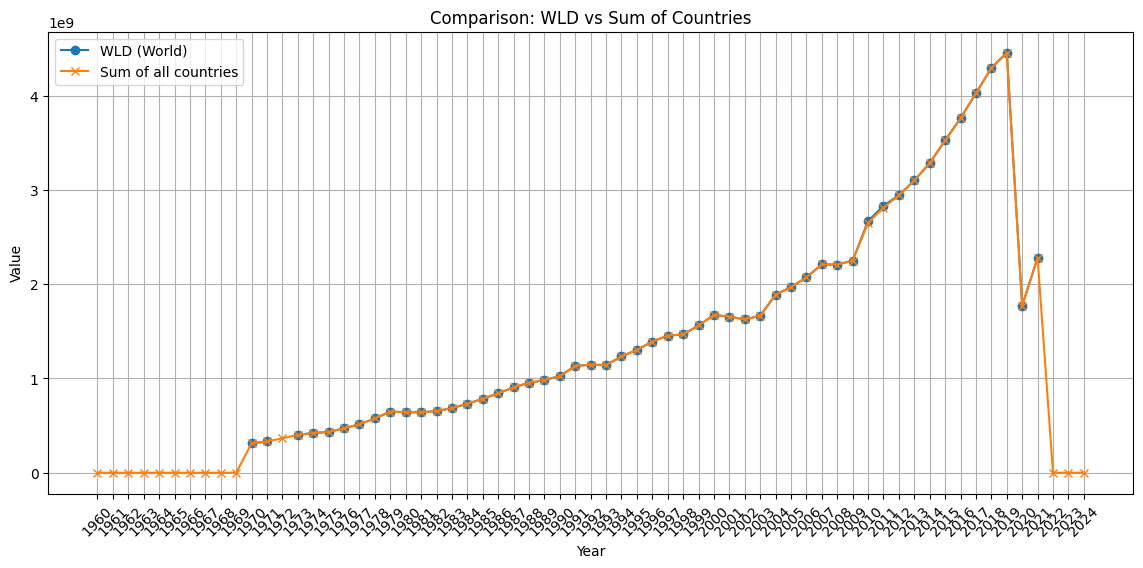

In [8]:
# All columns that are years (numeric) for aggregation
year_cols = [col for col in main.columns if col.isdigit()]

# Extract Word aggregation
wld_values = main.loc[main["Country Code"] == "WLD", year_cols].iloc[0]

# Sum over all countries
countries_sum = main_clean.loc[:,year_cols].sum()

comparison_check = (countries_sum == wld_values)
print(comparison_check.value_counts())

# Differences
difference = wld_values - countries_sum
mismatches = difference[difference != 0]

print("Years with mismatches and their differences:")
print(mismatches)


# Plot 
plt.figure(figsize=(14,6))
plt.plot(year_cols, wld_values, marker='o', label='WLD (World)')
plt.plot(year_cols, countries_sum, marker='x', label='Sum of all countries')
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Value")
plt.title(f"Comparison: WLD vs Sum of Countries")
plt.legend()
plt.grid(True)
plt.show()

## Export Clean Data for Power BI

In [9]:
main_clean.to_csv("API_IS.AIR.PSGR_DS2_en_csv_v2_294362/API_IS.AIR.PSGR_DS2_en_csv_v2_294362_clean.csv", index=False)
meta_country_clean.to_csv("API_IS.AIR.PSGR_DS2_en_csv_v2_294362/Metadata_Country_API_IS.AIR.PSGR_DS2_en_csv_v2_294362_clean.csv", index=False)